# FUNDAMENTALS_24 딥러닝 레이어의 이해 / Embedding, Recurrent 레이어

## 분포 가설과 분산 표현

  - 컴퓨터의 시각적 능력을 위해 Convolution 레이어가 필요했다면 이번엔 언어적 능력에 대해서 다뤄본다.
  - 컴퓨터에게 바나나와 사과를 가르치기 위해서는 바나나는 1, 사과는 0 이라고 순번을 매겨서 가르칠 수 있다.
  - 하지만 다른 특징을 가진 비슷한 과일들을 가르치기가 어렵다는 문제점이 있다.
  - 추가적인 특징을 부여해서 사과는 (0,0) 바나나는 (1,1) 배는 (0,1) 처럼 2차원 이상의 벡터로 표현할 수 있다.
  - 그렇지만 이렇게 표현하는 것도 특징이 많아질수록 백터의 차원이 엄청 커진다는 문제점이 있다.
  - 이렇게 벡터의 특정 차원에 단어 혹은 의미를 직접 매핑하는 방식을 희소 표현(Sparse Representation)이라고 한다.

### 유사한 맥락에서 나타나는 단어는 그 의미도 비슷하다라는 것이 분포 가설(distribution hypothesis)이라고 한다.
### 유사한 맥락에 나타난 단어들끼리 두 단어 벡터 사이의 거리를 가깝게 하고, 그렇지 않은 단어들끼리는 멀어지게 조정해주는 것을 분산 표현(Distributed Representation)이라고 한다.

## Embedding 레이어

  - Embedding 레이어는 단어의 분산 표현을 구현하기 위한 레이어이다. 쉽게 이해하려면 컴퓨터용 단어 사전으로 이해하면 쉽다.
  - 분산 표현은 단어를 표현하는데에만 사용되는 것이 아닌 의미적 유사성을 가지는 것들을 컴퓨터에 가르치는 방법으로 활용된다.
  - 단어를 더 깊게 표현하기 위해서는 Embedding 사이즈를 정해주면 된다.
  - 그럼 weight는 단어의 개수, embedding 사이즈로 정의되는 것을 알 수 있다.

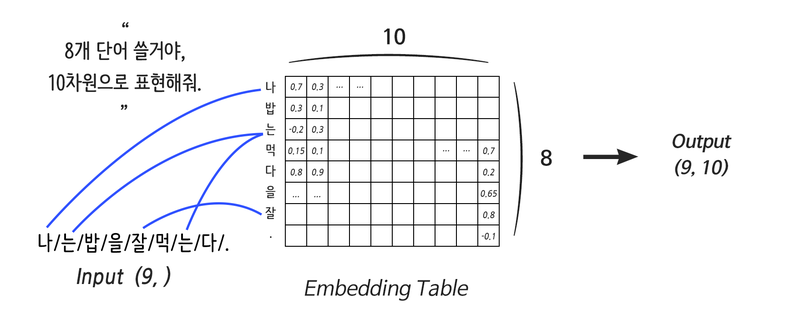
- 출처 : lms aiffel node

  - embedding 레이어는 원-핫 인코딩(one-hot encoding)과 함께 결합하여 매우 유용하게 사용될 수 있다.
  - 원-핫 인코딩은 n개의 단어를 n차원 벡터로 표현하는데 단어가 들어가는 자리에는 1, 그 이외의 모든 자리에응 0을 넣어서 표현한다.
  

In [1]:
# 원-핫 인코딩 예시

import tensorflow as tf

vocab = {      # 사용할 단어 사전 정의
    "i": 0,
    "need": 1,
    "some": 2,
    "more": 3,
    "coffee": 4,
    "cake": 5,
    "cat": 6,
    "dog": 7
}

sentence = "i i i i need some more coffee coffee coffee"
# 위 sentence
_input = [vocab[w] for w in sentence.split()]  # [0, 0, 0, 0, 1, 2, 3, 4, 4, 4]

vocab_size = len(vocab)   # 8

one_hot = tf.one_hot(_input, vocab_size)
print(one_hot.numpy())    # 원-핫 인코딩 벡터를 출력해 봅시다.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [2]:
# 원-핫 인코딩 결과를 Linear 레이어에 넣어보기

distribution_size = 2   # 보기 좋게 2차원으로 분산 표현하도록 하죠!
linear = tf.keras.layers.Dense(units=distribution_size, use_bias=False)
one_hot_linear = linear(one_hot)

print("Linear Weight")
print(linear.weights[0].numpy())

print("\nOne-Hot Linear Result")
print(one_hot_linear.numpy())

Linear Weight
[[-0.7329693  -0.30173323]
 [ 0.06623322  0.6786994 ]
 [ 0.51973236 -0.620007  ]
 [-0.5620773  -0.75515544]
 [ 0.6022439  -0.33762932]
 [ 0.16773438  0.02152646]
 [ 0.14984256  0.67289364]
 [ 0.27809107  0.5233351 ]]

One-Hot Linear Result
[[-0.7329693  -0.30173323]
 [-0.7329693  -0.30173323]
 [-0.7329693  -0.30173323]
 [-0.7329693  -0.30173323]
 [ 0.06623322  0.6786994 ]
 [ 0.51973236 -0.620007  ]
 [-0.5620773  -0.75515544]
 [ 0.6022439  -0.33762932]
 [ 0.6022439  -0.33762932]
 [ 0.6022439  -0.33762932]]


  - 원-핫 벡터에 Linear 레이어를 적용하니까 Linear 레이어의 weight에서 단어 인덱스 배열 [0, 0, 0, 0, 1, 2, 3, 4, 4, 4]에 해당하는 행만 읽어오는 효과가 있다.


In [3]:
# Tensorflow에서 Embedding 레이어 선언하기

some_words = tf.constant([[3, 57, 35]])
# 3번 단어 / 57번 단어 / 35번 단어로 이루어진 한 문장입니다.

print("Embedding을 진행할 문장:", some_words.shape)
embedding_layer = tf.keras.layers.Embedding(input_dim=64, output_dim=100)
# 총 64개의 단어를 포함한 Embedding 레이어를 선언할 것이고,
# 각 단어는 100차원으로 분산 표현 할 것입니다.

print("Embedding된 문장:", embedding_layer(some_words).shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

Embedding을 진행할 문장: (1, 3)
Embedding된 문장: (1, 3, 100)
Embedding Layer의 Weight 형태: (64, 100)


  - Embedding 레이어는 쉽지만 주의해야할 사항이 있다.
  - Embedding 레이어는 그저 단어를 대응시켜줄 뿐 미분이 불가능하다.
  - 그렇기 때문에 신경망 설계를 할 때 어떤 연산 결과를 Embedding 레이어에 연결시키는 것은 불가능하다.
  - Embedding 레이어는 입력에 직접 연결되게 사용해야 하고 그 입력은 원-핫 인코딩된 단어 벡터의 형태일때가 가장 이상적이다.

## 순차적인 데이터! Recurrent 레이어 / RNN

  - 문장이나 영상, 음성 등의 데이터는 한장의 이미지 데이터와는 다른 특성을 가진다.
  - 바로 순차적인(Sequential)특성이다. 시간의 개념을 도입해서 생각하면 이해하기 쉽다.
  - 나는 밥을 {}는다. 라는 예문에서 빈칸에 들어갈 말이 {먹}이라는 것은 알기 쉽다.
  - 그 근거는 {먹}이 등장하기 전 시점의 {밥}이라는 단어 때문이다.
  - 데이터의 나열 사이에 연관성이 없다고 해서 순차적인 데이터가 아니라고 할 수 없다.
  - 인공지능이 예측을 하기 위해서는 요소 간의 연관성이 있어야 하고 그것을 시퀀스 데이터는 순차적인 특성을 필수로 갖는다고 말할 수 있다.

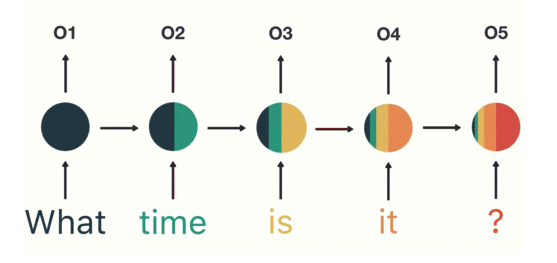
- 출처 : Illustrated Guide to Recurrent Neural Networks

  - 위 그림에서 보면 첫 입력은 what의 정보가 마지막 입력인 ?에 다다라서는 거의 희석된 모습을 보여주고 있다.
  - 이런 문제를 기울기 소실(Vanishing Gradient)라고 한다.

In [4]:
# RNN 코드

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

print("RNN에 입력할 문장:", sentence)

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

print("Embedding을 위해 단어 매핑:", sentence_tensor.numpy())
print("입력 문장 데이터 형태:", sentence_tensor.shape)

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("\nEmbedding 결과:", emb_out.shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

rnn_seq_layer = \
tf.keras.layers.SimpleRNN(units=64, return_sequences=True, use_bias=False)
rnn_seq_out = rnn_seq_layer(emb_out)

print("\nRNN 결과 (모든 Step Output):", rnn_seq_out.shape)
print("RNN Layer의 Weight 형태:", rnn_seq_layer.weights[0].shape)

rnn_fin_layer = tf.keras.layers.SimpleRNN(units=64, use_bias=False)
rnn_fin_out = rnn_fin_layer(emb_out)

print("\nRNN 결과 (최종 Step Output):", rnn_fin_out.shape)
print("RNN Layer의 Weight 형태:", rnn_fin_layer.weights[0].shape)

RNN에 입력할 문장: What time is it ?
Embedding을 위해 단어 매핑: [[2 3 0 1 4]]
입력 문장 데이터 형태: (1, 5)

Embedding 결과: (1, 5, 100)
Embedding Layer의 Weight 형태: (5, 100)

RNN 결과 (모든 Step Output): (1, 5, 64)
RNN Layer의 Weight 형태: (100, 64)

RNN 결과 (최종 Step Output): (1, 64)
RNN Layer의 Weight 형태: (100, 64)


### 어떤 문장이 긍정인지 부정인지 나누기 위해서는 문장을 모두 읽은 후 최종 step의 output만 확인해도 판단이 가능하다.
### 그것은 위 코드에서 tk.keras.layers.SimpleRNN 레이어의 returen_sequences 인자를 조절함으로써 조절할 수 있다.

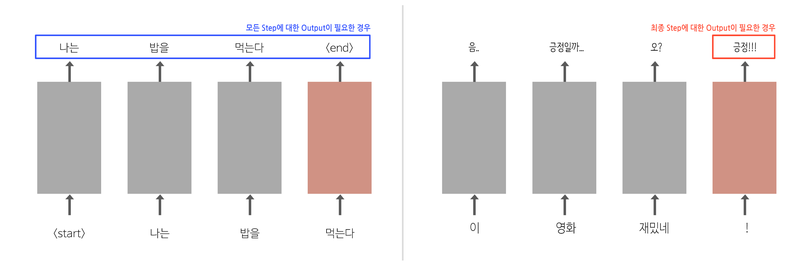

  - (좌) 모든 Step에 대한 Output이 필요한 경우 (return_sequences=True) (우) 최종 Step에 대한 Output만 필요한 경우 (return_sequences=False)

In [5]:
# RNN 레이어 변경 코드 / 작동 방식은 위 코드와 동일

lstm_seq_layer = tf.keras.layers.LSTM(units=64, return_sequences=True, use_bias=False)
lstm_seq_out = lstm_seq_layer(emb_out)

print("\nLSTM 결과 (모든 Step Output):", lstm_seq_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_seq_layer.weights[0].shape)

lstm_fin_layer = tf.keras.layers.LSTM(units=64, use_bias=False)
lstm_fin_out = lstm_fin_layer(emb_out)

print("\nLSTM 결과 (최종 Step Output):", lstm_fin_out.shape)
print("LSTM Layer의 Weight 형태:", lstm_fin_layer.weights[0].shape)


LSTM 결과 (모든 Step Output): (1, 5, 64)
LSTM Layer의 Weight 형태: (100, 256)

LSTM 결과 (최종 Step Output): (1, 64)
LSTM Layer의 Weight 형태: (100, 256)


  - LSTM은 Embedding 벡터의 차원수(unit)의 크기가 동일할 경우 weight의 크기가 위에서 사용했던 simpleRNN의 4배나 더 많은 것을 확인할 수 있다.

## 순차적인 데이터! Recurrent 레이어 / LSTM

  - LSTM은 long short-term memory의 약어로 기울기 소실 문제를 해결하기 위해 고안된 RNN 레이어이다.
  - RNN의 네트워크 구조 특성상 입력되는 문장이 길수록 입력된 단어들의 미분 값이 매우 작아지거나 커지는 현상이 발생한다.
  - LSTM은 Cell state라는 새로운 개념이 추가되는데 긴 문장이 들어와도 이 Cell state를 통해 오래된 기억 또한 큰 손실 없이 저장해준다.

### LSTM은 3개의 Gate layer를 가지는데 각각의 역할은 무엇인가?

  - Forget Gate Layer : cell state의 기존 정보를 얼마나 잊어버릴지 결정하는 gate
  - Input Gate Layer : 새롭게 만들어진 cell state를 기존 cell state에 얼마나 반영할지를 결정하는 gate
  - Output Gate Layer : 새롭게 만들어진 cell state를 새로운 hidden state에 얼마나 반영할지를 결정하는 gate

### 2014년에 소개된 GRU는 지금도 많이 사용되고 있는데 GRU의 특징은?

  - LSTM의 Forget Gate와 Input Gate를 Update Gate로 합치고 Cell state와 Hidden state를 합쳤다.
  - LSTM에 비해 GRU가 학습할 가중치(weight)가 더 적다. (LSTM의 1/4 수준)

### 양방향(Bidirectional) RNN

  - 양방향 RNN이란 진행 방향에 변화를 준 RNN이다.
  - 지금까지 배운 RNN은 순방향이기 때문에 정보가 없으면 빈칸에 들어갈 단어를 옳바르게 생성하기 어렵다.
  - 그렇기 때문에 진행 방향이 반대인 RNN을 2개 겹쳐서 진행되도록 한다.
  - 양방향 RNN은 문장 분석이나 생성보다는 기계번역같은 테스크에 유리하다.

In [6]:
# 양방향 RNN 코드

import tensorflow as tf

sentence = "What time is it ?"
dic = {
    "is": 0,
    "it": 1,
    "What": 2,
    "time": 3,
    "?": 4
}

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("입력 문장 데이터 형태:", emb_out.shape)

bi_rnn = \
tf.keras.layers.Bidirectional(
    tf.keras.layers.SimpleRNN(units=64, use_bias=False, return_sequences=True)
)
bi_out = bi_rnn(emb_out)

print("Bidirectional RNN 결과 (최종 Step Output):", bi_out.shape)

입력 문장 데이터 형태: (1, 5, 100)
Bidirectional RNN 결과 (최종 Step Output): (1, 5, 128)


  - 양방향 RNN은 순방향 weight와 역방향 weight를 각각 정의하기 때문에 앞에서의 순방향 RNN의 2배 크기의 weight를 가지게 된다.